# WeatherPy
-----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)
#print(cities)

915

In [3]:
# Create an "extracts" object to get the temperature, latitude,
# and longitude in each city


In [4]:
dataList = []
#summary = ['city',"country", "date","latitude","longitude,""temperature" ,"cloudiness","windSpeed"]
#api.openweathermap.org/data/2.5/weather?

for city in cities:
  
    cityurl = "http://api.openweathermap.org/data/2.5/weather?q="+city+"&appid="+api_key
    try:
        Resolves = requests.get(cityurl).json()
        #print(Resolves)
        temperature = Resolves['main']['temp_max']
        humidity =Resolves['main']['humidity']
        cloudiness = Resolves['clouds']['all']
        windSpeed = Resolves['wind']['speed']
        latitude = Resolves['coord']['lon']
        longitude = Resolves['coord']['lat']
        #pprint(Resolves)
        country = Resolves['sys']['country']
        #CityID = Resolves['weather']['id']
        date = Resolves['dt']
        dataList.append({'city':city,'Country':country,'Date':date, 'Latitude':latitude,'Longitude': longitude, 'Temperature':temperature, 'Humidity':humidity,
                        'Cloudiness':cloudiness, 'Wind Speed': windSpeed } )
      
        
    except:
        #print("City not Found")
        pass 
        
    
        

In [5]:
# create a data frame from the list
#dataList

In [6]:
weather_df = pd.DataFrame(dataList)
weather_df.head()
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df.to_csv("output_data_cities.csv", index=False, header=True)

weather_df.head()

,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed,city
0,90,CL,1970-01-01 00:00:01.562613986,100,-73.76,-42.48,283.15,8.70,castro
1,40,NU,1970-01-01 00:00:01.562614001,100,-169.92,-19.06,293.15,0.50,alofi
2,40,CA,1970-01-01 00:00:01.562613967,70,-133.03,69.44,282.15,3.10,tuktoyaktuk
3,97,CA,1970-01-01 00:00:01.562614006,55,-96.99,50.56,300.93,1.34,husavik
4,100,PF,1970-01-01 00:00:01.562613782,93,-134.97,-23.12,294.93,8.10,rikitea


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

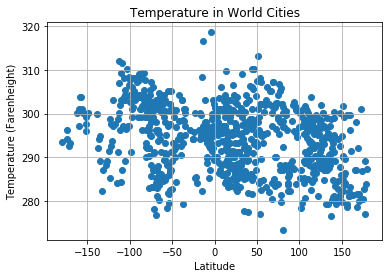

In [7]:
#create plot for latitude / temperature

plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheight)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature Versus Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

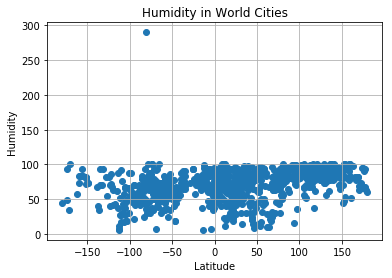

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude versus Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

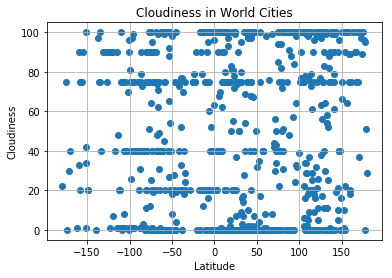

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude versus Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

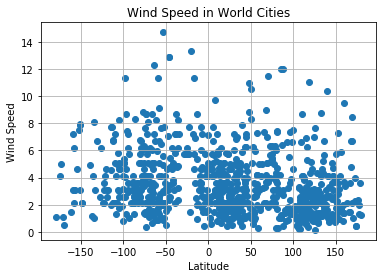

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude versus Wind Speed.png")

# Show plot
plt.show()